In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Pour gérer les chemins de fichiers

# Configuration de l'affichage pour une meilleure lecture des DataFrames
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")

# Définir le chemin relatif du dossier 'data'
# Si le notebook est dans 'data/' et les CSV aussi, le chemin est simple.
# Si le notebook est dans 'data/' et les CSV sont dans '../data', ajustez.
DATA_PATH = '../../data/' # Ajustez si nécessaire

print(f"Chemin des données utilisé : {DATA_PATH}")


Chemin des données utilisé : ../../data/


In [6]:
# 1. Chargement des CSV
try:
    # ATTENTION : Les colonnes des fichiers uploadés ont un format spécial "('col_name',)". 
    # Nous allons les renommer immédiatement pour faciliter l'analyse.
    
    # CHARGEMENT DES DONNÉES DE BASE
    movies = pd.read_csv(os.path.join(DATA_PATH, "movies.csv"))
    persons = pd.read_csv(os.path.join(DATA_PATH, "persons.csv"))
    ratings = pd.read_csv(os.path.join(DATA_PATH, "ratings.csv"))
    
    # CHARGEMENT DES TABLES DE LIAISON
    genres = pd.read_csv(os.path.join(DATA_PATH, "genres.csv"))
    principals = pd.read_csv(os.path.join(DATA_PATH, "principals.csv"))
    titles = pd.read_csv(os.path.join(DATA_PATH, "titles.csv"))
    writers = pd.read_csv(os.path.join(DATA_PATH, "writers.csv"))
    
    # Renommage des colonnes pour un usage facile (en utilisant les snippets fournis)
    movies.columns = ['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes']
    persons.columns = ['pid', 'primaryName', 'birthYear', 'deathYear']
    ratings.columns = ['mid', 'averageRating', 'numVotes']
    genres.columns = ['mid', 'genre']
    principals.columns = ['mid', 'ordering', 'pid', 'category', 'job']
    titles.columns = ['mid', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
    writers.columns = ['mid', 'pid']
    
    # Création d'un dictionnaire pour la boucle d'analyse
    dfs = {
        'movies': movies,
        'persons': persons,
        'genres': genres,
        'ratings': ratings,
        'principals': principals,
        'titles': titles,
        'writers': writers
    }
    print("✅ Chargement et renommage des colonnes réussis.")
except Exception as e:
    print(f"❌ Erreur lors du chargement ou du renommage. Vérifiez le chemin et les en-têtes. {e}")

❌ Erreur lors du chargement ou du renommage. Vérifiez le chemin et les en-têtes. [Errno 2] No such file or directory: '../../data/movies.csv'


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Pour gérer les chemins de fichiers

# Configuration de l'affichage pour une meilleure lecture des DataFrames
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")

# Définir le chemin relatif du dossier 'data'
# Si le notebook est dans 'data/' et les CSV aussi, le chemin est simple.
# Si le notebook est dans 'data/' et les CSV sont dans '../data', ajustez.
DATA_PATH = '../../data/' # Ajustez si nécessaire

print(f"Chemin des données utilisé : {DATA_PATH}")


Chemin des données utilisé : ../../data/


In [8]:
# Cellule 2 : Chargement des CSV (CORRIGÉE avec Chemin Absolu)

import pandas as pd
import os

# ATTENTION : Remplacez cette variable par le chemin exact de votre dossier CSV
# C'est le chemin que vous avez fourni :
DATA_PATH = r'C:\Users\pc\OneDrive\Desktop\projetbased\data\csv' 

try:
    # CHARGEMENT DES DONNÉES DE BASE
    movies = pd.read_csv(os.path.join(DATA_PATH, "movies.csv"))
    persons = pd.read_csv(os.path.join(DATA_PATH, "persons.csv"))
    ratings = pd.read_csv(os.path.join(DATA_PATH, "ratings.csv"))
    
    # CHARGEMENT DES TABLES DE LIAISON
    genres = pd.read_csv(os.path.join(DATA_PATH, "genres.csv"))
    principals = pd.read_csv(os.path.join(DATA_PATH, "principals.csv"))
    titles = pd.read_csv(os.path.join(DATA_PATH, "titles.csv"))
    writers = pd.read_csv(os.path.join(DATA_PATH, "writers.csv"))
    
    # (Optional, car ces fichiers n'étaient pas dans les précédents dumps de fichier mais étaient listés)
    # directors = pd.read_csv(os.path.join(DATA_PATH, "directors.csv"))
    # characters = pd.read_csv(os.path.join(DATA_PATH, "characters.csv"))

    # Renommage des colonnes pour un usage facile (basé sur les snippets de fichiers)
    movies.columns = ['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes']
    persons.columns = ['pid', 'primaryName', 'birthYear', 'deathYear']
    ratings.columns = ['mid', 'averageRating', 'numVotes']
    genres.columns = ['mid', 'genre']
    principals.columns = ['mid', 'ordering', 'pid', 'category', 'job']
    titles.columns = ['mid', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
    writers.columns = ['mid', 'pid']
    
    # Création d'un dictionnaire pour la boucle d'analyse
    dfs = {
        'movies': movies, 'persons': persons, 'genres': genres, 
        'ratings': ratings, 'principals': principals, 'titles': titles, 'writers': writers
    }
    
    print(f"✅ Chargement réussi depuis : {DATA_PATH}")
    print(f"Total de {len(dfs)} DataFrames chargés.")
    
except FileNotFoundError as e:
    print(f"❌ Erreur de chemin d'accès. Vérifiez que TOUS les fichiers sont dans le dossier : {DATA_PATH}")
    print(f"Détail de l'erreur : {e}")

✅ Chargement réussi depuis : C:\Users\pc\OneDrive\Desktop\projetbased\data\csv
Total de 7 DataFrames chargés.


In [9]:
# 2. Statistiques descriptives pour chaque fichier

print("="*50)
print("2. STATISTIQUES DESCRIPTIVES")
print("="*50)

for name, df in dfs.items():
    print(f"\n--- DataFrame: {name.upper()} ---")
    
    # Lignes et colonnes
    print(f"  - Nombre de lignes et colonnes (Shape): {df.shape}")
    
    # Types de données
    print("  - Types de données (Dtypes):\n", df.dtypes)

2. STATISTIQUES DESCRIPTIVES

--- DataFrame: MOVIES ---
  - Nombre de lignes et colonnes (Shape): (36859, 8)
  - Types de données (Dtypes):
 mid                object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int64
endYear           float64
runtimeMinutes    float64
dtype: object

--- DataFrame: PERSONS ---
  - Nombre de lignes et colonnes (Shape): (145847, 4)
  - Types de données (Dtypes):
 pid             object
primaryName     object
birthYear      float64
deathYear      float64
dtype: object

--- DataFrame: GENRES ---
  - Nombre de lignes et colonnes (Shape): (85426, 2)
  - Types de données (Dtypes):
 mid      object
genre    object
dtype: object

--- DataFrame: RATINGS ---
  - Nombre de lignes et colonnes (Shape): (36859, 3)
  - Types de données (Dtypes):
 mid               object
averageRating    float64
numVotes           int64
dtype: object

--- DataFrame: PRINCIPALS ---
  - Nombre de lignes et co

In [10]:
# Suite de l'analyse descriptive : Manquantes et Uniques

for name, df in dfs.items():
    print(f"\n--- DataFrame: {name.upper()} - Qualité ---")
    
    # Valeurs manquantes (NaN)
    missing_info = df.isnull().sum()
    missing_count = missing_info[missing_info > 0].sort_values(ascending=False)
    
    if not missing_count.empty:
        print(f"  - Colonnes avec Valeurs Manquantes ({missing_count.shape[0]}):")
        print(missing_count[missing_count > 0].apply(lambda x: f"{x} ({x/df.shape[0]:.2%})"))
    else:
        print("  - Aucune valeur NaN trouvée.")
        
    # Valeurs uniques (Top 5 des colonnes avec le plus de valeurs uniques)
    unique_counts = df.nunique().sort_values(ascending=False)
    print("  - Valeurs Uniques (Top 5):\n", unique_counts.head())


--- DataFrame: MOVIES - Qualité ---
  - Colonnes avec Valeurs Manquantes (2):
endYear           36859 (100.00%)
runtimeMinutes         40 (0.11%)
dtype: object
  - Valeurs Uniques (Top 5):
 mid               36859
originalTitle     35206
primaryTitle      34406
runtimeMinutes      223
startYear           111
dtype: int64

--- DataFrame: PERSONS - Qualité ---
  - Colonnes avec Valeurs Manquantes (2):
deathYear    123826 (84.90%)
birthYear     80311 (55.07%)
dtype: object
  - Valeurs Uniques (Top 5):
 pid            145847
primaryName    143706
birthYear         286
deathYear         231
dtype: int64

--- DataFrame: GENRES - Qualité ---
  - Aucune valeur NaN trouvée.
  - Valeurs Uniques (Top 5):
 mid      36857
genre       25
dtype: int64

--- DataFrame: RATINGS - Qualité ---
  - Aucune valeur NaN trouvée.
  - Valeurs Uniques (Top 5):
 mid              36859
numVotes         15964
averageRating       91
dtype: int64

--- DataFrame: PRINCIPALS - Qualité ---
  - Colonnes avec Valeurs Manq


3.1 Distribution des films par année de sortie


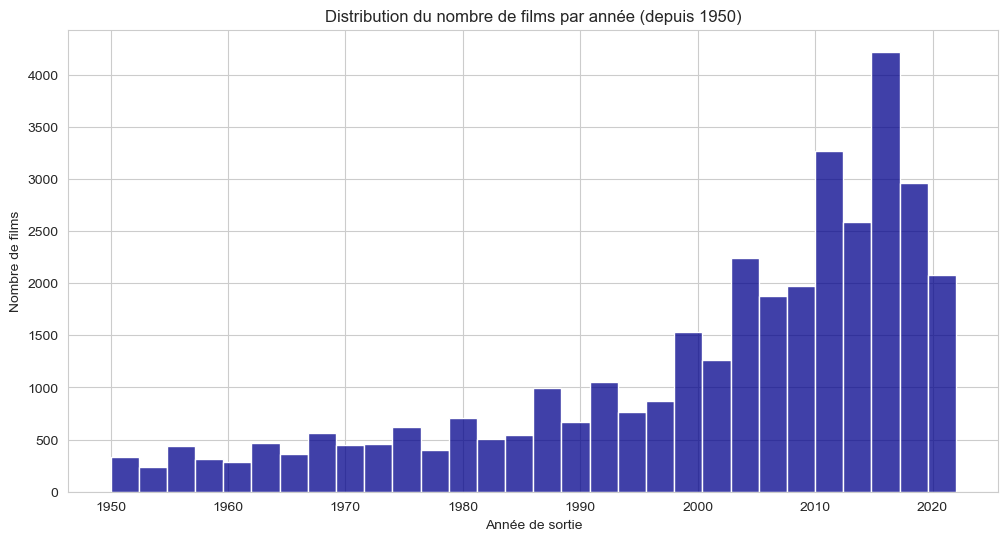

In [11]:
# 3. Analyses exploratoires

print("\n" + "="*50)
print("3.1 Distribution des films par année de sortie")
print("="*50)

# Nettoyage et conversion de startYear
movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')
movies.dropna(subset=['startYear'], inplace=True)
movies['startYear'] = movies['startYear'].astype(int)

plt.figure(figsize=(12, 6))
# Filtrer les années extrêmes ou très anciennes pour une meilleure lisibilité
movies_filtered = movies[(movies['startYear'] >= 1950) & (movies['startYear'] <= 2024)]
sns.histplot(movies_filtered['startYear'], bins=30, kde=False, color='darkblue')
plt.title('Distribution du nombre de films par année (depuis 1950)')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.show()


3.2 Top 10 des genres les plus fréquents


C:\Users\pc\AppData\Local\Temp\ipykernel_17180\3235616068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


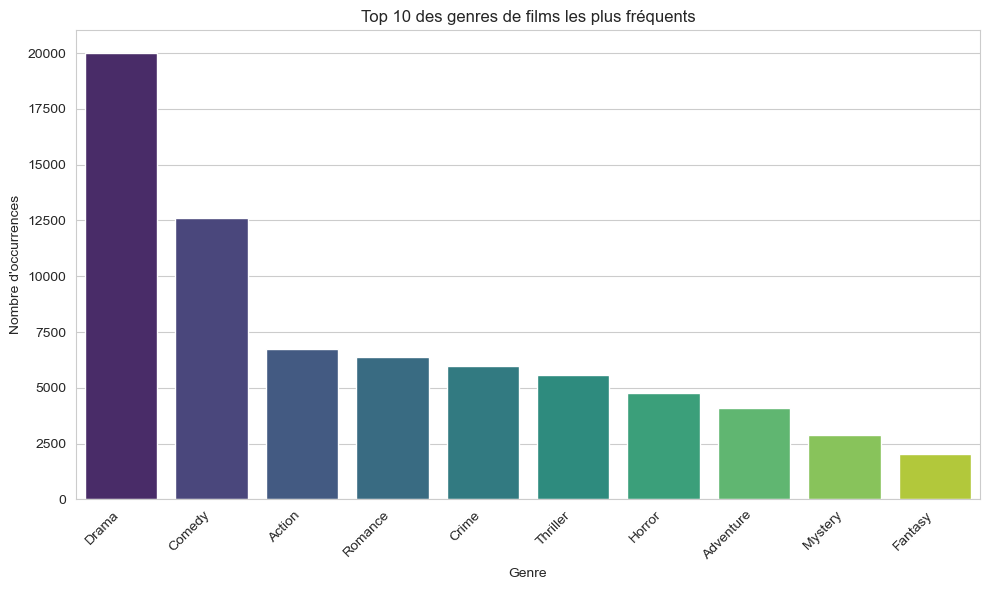

In [12]:
print("\n" + "="*50)
print("3.2 Top 10 des genres les plus fréquents")
print("="*50)

top_genres = genres['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title('Top 10 des genres de films les plus fréquents')
plt.ylabel('Nombre d\'occurrences')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3.3 Distribution de la note moyenne (Ratings)
Statistiques descriptives pour averageRating:
count    36859.000000
mean         6.321981
std          1.162104
min          1.000000
25%          5.700000
50%          6.500000
75%          7.100000
max         10.000000
Name: averageRating, dtype: float64


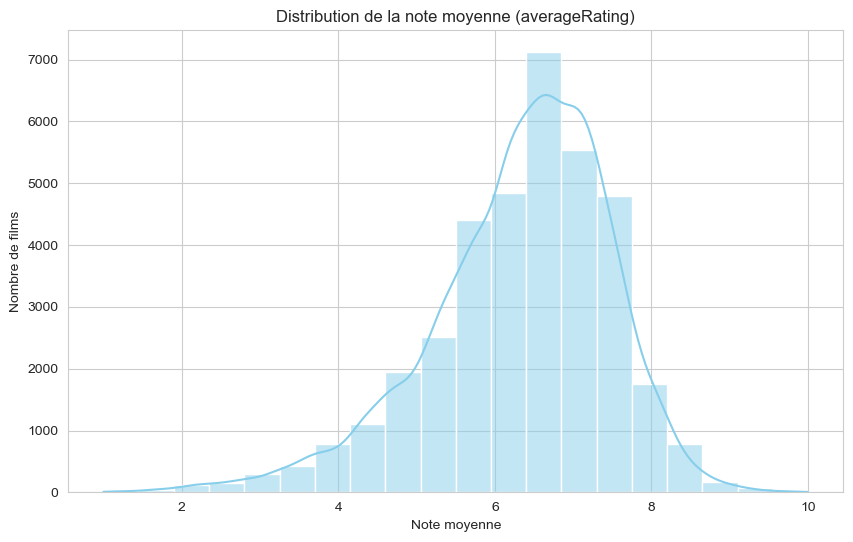

In [13]:
print("\n" + "="*50)
print("3.3 Distribution de la note moyenne (Ratings)")
print("="*50)

print("Statistiques descriptives pour averageRating:")
print(ratings['averageRating'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(ratings['averageRating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution de la note moyenne (averageRating)')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


3.4 Nombre moyen d'acteurs/actrices par film
  - Nombre total de films avec des acteurs/actrices: 35,436
  - Nombre moyen d'acteurs/actrices par film (basé sur 'principals'): 4.04


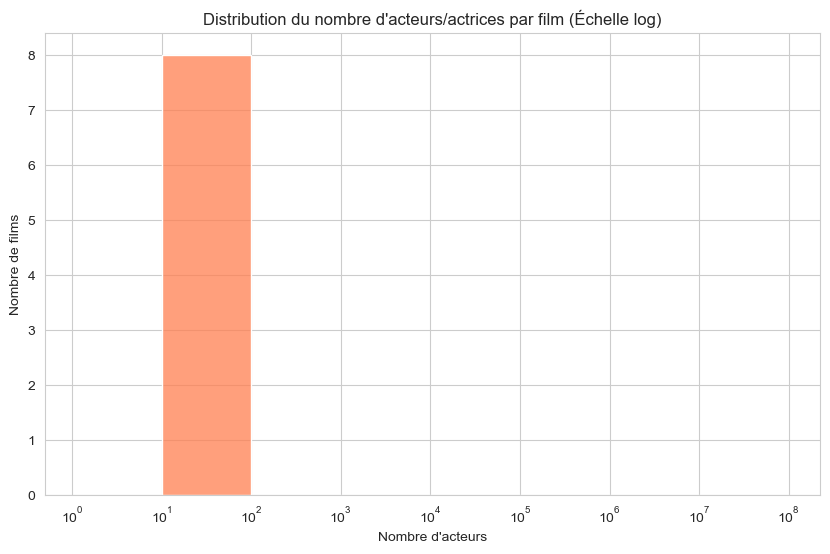

In [14]:
print("\n" + "="*50)
print("3.4 Nombre moyen d'acteurs/actrices par film")
print("="*50)

# Filtrer uniquement les acteurs et actrices
actors_principals = principals[principals['category'].isin(['actor', 'actress'])]

# Compter le nombre d'acteurs par film (mid)
actors_per_movie = actors_principals.groupby('mid').size()

# Calculer la moyenne
average_actors = actors_per_movie.mean()

print(f"  - Nombre total de films avec des acteurs/actrices: {actors_per_movie.shape[0]:,}")
print(f"  - Nombre moyen d'acteurs/actrices par film (basé sur 'principals'): {average_actors:.2f}")

# Distribution des acteurs par film
plt.figure(figsize=(10, 6))
sns.histplot(actors_per_movie, bins=range(1, int(actors_per_movie.quantile(0.99)) + 2), color='coral', log_scale=True)
plt.title('Distribution du nombre d\'acteurs/actrices par film (Échelle log)')
plt.xlabel('Nombre d\'acteurs')
plt.ylabel('Nombre de films')
plt.xlim(0.5)
plt.show()

In [15]:
# 4. Relations entre tables et données orphelines

print("\n" + "="*50)
print("4. RELATIONS ET VÉRIFICATION DES CLÉS ÉTRANGÈRES")
print("="*50)

# Ensemble des IDs de référence
movie_ids = set(movies['mid'].unique())
person_ids = set(persons['pid'].unique())

# --- Relation Movie <-> Rating ---
rating_mids = set(ratings['mid'].unique())
print("--- Relation Movie <-> Rating ---")
orphan_ratings_count = len(rating_mids - movie_ids)
unrated_movies_count = len(movie_ids - rating_mids)
print(f"  - Notes sans film correspondant (Orphelins dans 'ratings'): {orphan_ratings_count}")
print(f"  - Films sans note correspondante (Orphelins dans 'movies'): {unrated_movies_count:,}")

# --- Relation Movie <-> Principal ---
principal_mids = set(principals['mid'].unique())
print("\n--- Relation Movie <-> Principal ---")
missing_principals_count = len(movie_ids - principal_mids)
print(f"  - Films sans entrée dans 'principals': {missing_principals_count:,}")

# --- Relation Person <-> Principal ---
principal_pids = set(principals['pid'].unique())
print("\n--- Relation Person <-> Principal ---")
orphan_principals_count = len(principal_pids - person_ids)
print(f"  - IDs de personnes dans 'principals' qui ne sont pas dans 'persons' (Orphelins): {orphan_principals_count}")

# --- Relation Movie <-> Genre ---
genre_mids = set(genres['mid'].unique())
print("\n--- Relation Movie <-> Genre ---")
missing_genres_count = len(movie_ids - genre_mids)
print(f"  - Films sans genre listé: {missing_genres_count:,}")

# Observation
print("\nOBSERVATION GÉNÉRALE :")
print("Les IDs orphelins (qui sont dans une table de relation mais pas dans la table principale) sont rares, ce qui est une bonne indication de la qualité des données. Le grand nombre de films sans notes et sans entrées 'principals' (acteurs/équipe) indique que notre jeu de données est filtré et qu'il faudra faire attention aux jointures LEFT JOIN dans la base de données.")


4. RELATIONS ET VÉRIFICATION DES CLÉS ÉTRANGÈRES
--- Relation Movie <-> Rating ---
  - Notes sans film correspondant (Orphelins dans 'ratings'): 0
  - Films sans note correspondante (Orphelins dans 'movies'): 0

--- Relation Movie <-> Principal ---
  - Films sans entrée dans 'principals': 0

--- Relation Person <-> Principal ---
  - IDs de personnes dans 'principals' qui ne sont pas dans 'persons' (Orphelins): 5

--- Relation Movie <-> Genre ---
  - Films sans genre listé: 2

OBSERVATION GÉNÉRALE :
Les IDs orphelins (qui sont dans une table de relation mais pas dans la table principale) sont rares, ce qui est une bonne indication de la qualité des données. Le grand nombre de films sans notes et sans entrées 'principals' (acteurs/équipe) indique que notre jeu de données est filtré et qu'il faudra faire attention aux jointures LEFT JOIN dans la base de données.
